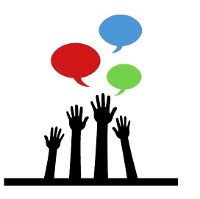
<h1><center>THE SPARKS FOUNDATION</center></h1>  
<h2><center><font color='cyan'>Graduate Rotational Internship Program</font></center></h2>

***

<h3><center>Data Science and Business Analytics Internship</center></h3>
<h3><center><font color='coral'>By:- Dhiraj Naganath Patil</font></center></h3>

<h2><center>Prediction Using Unsuperwised Machine Learning</center></h2>
<h3><center>(Level-Beginner)</center></h3>

<h3><center><font color='blue'>Task2:-Clustering</font></center></h3>

**In this task we have to predict the optimum number of clusters and represent it visually<br>Dataset:-Iris**


**Import all necesary libraries**

In [51]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

**Load Dataset**

In [2]:
df=pd.read_csv("C:\\Users\\DHIRAJ PATIL\\Desktop\\Python\\Datasets\\iris.csv")

[irisDataset](https://en.wikipedia.org/wiki/Iris_(plant))

In [3]:
df=df.sample(frac=1,random_state=123)

In [54]:
print('\nRows,Columns=',df.shape)


Rows,Columns= (150, 5)


In [5]:
df.head()

,petal_length,petal_width,sepal_length,sepal_width,type
72,6.3,2.5,4.9,1.5,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
88,5.6,3.0,4.1,1.3,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa


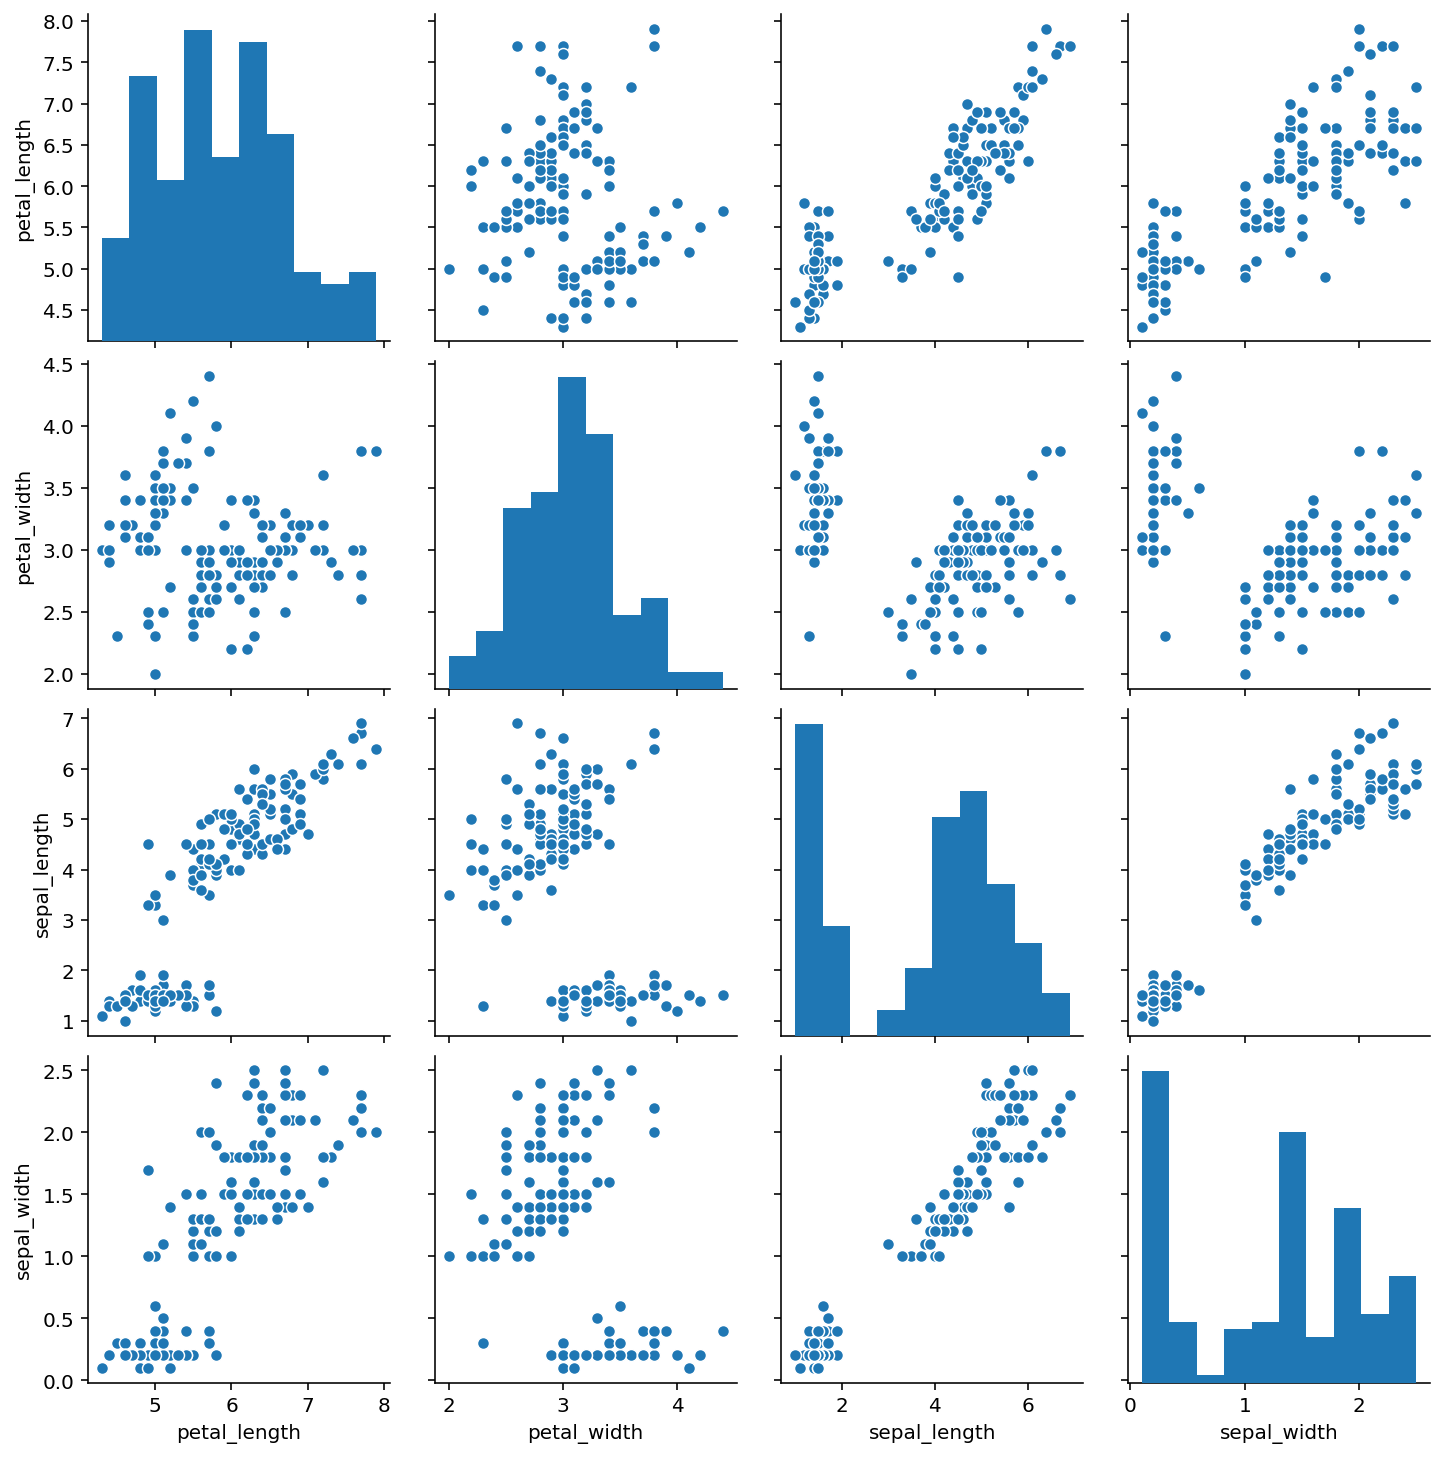

In [6]:
sn.pairplot(df)

In [7]:
df=df.drop(['type'],axis=1)

In [8]:
# There is no concept of splitting in unsupervise machie learning
# Check the optimal number of clusters using wcss
# Start with 10 clusters using and get the optimal

In [9]:
columns=df.columns
X=np.array(df[columns].values)

In [10]:
from sklearn.cluster import KMeans

**wcss:-Within-Cluster-Sum-of-Squares (WCSS),Our aim is optimal wcss**

In [12]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',
    max_iter=300,random_state=123).fit(X)
    # ‘k-means++’: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
    # appending the WCSS to the list
    # kmeans.inertia_ returns the WCSS value for an initialized cluster
    wcss.append(kmeans.inertia_)
    # Sum of squared distances of samples to their closest cluster center.


In [13]:
len(wcss)

10

In [14]:
print(wcss)

[680.8244000000001, 152.36870647733906, 78.940841426146, 57.3178732142857, 46.535582051282056, 38.9570111571199, 34.19698216257428, 30.22624214279014, 28.238320574162685, 26.511684343434354]


**Plotting the Elbow Graph**

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'WCSS')

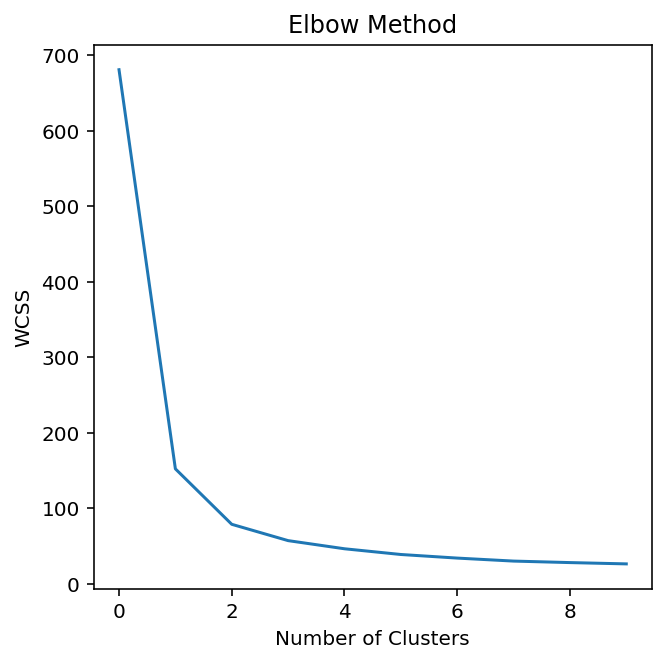

In [15]:
plt.figure(figsize=(5,5))
plt.plot(wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**1 cluster means whole dataset**

**We can see that after 3 the drop in WCSS is minimal.** 

**So we choose 3 as the optimal number of clusters.**

**Based on elbow graph,best clusters=3**

In [16]:
clusters=KMeans(n_clusters=3,init='k-means++',
                max_iter=300,random_state=123).fit_predict(X)

In [17]:
df['clusters']=clusters
df.head()

,petal_length,petal_width,sepal_length,sepal_width,clusters
72,6.3,2.5,4.9,1.5,0
112,6.8,3.0,5.5,2.1,2
132,6.4,2.8,5.6,2.2,2
88,5.6,3.0,4.1,1.3,0
37,4.9,3.1,1.5,0.1,1


In [18]:
df.clusters.value_counts()

0    62
1    50
2    38
Name: clusters, dtype: int64

**Visualising The Clusters**

**We will plot clusters w.r.t all possible combinations of colum names**

In [19]:
# Plot
df.columns

Index(['petal_length', 'petal_width', 'sepal_length', 'sepal_width',
       'clusters'],
      dtype='object')

**'petal_length' Vs 'petal_width'**

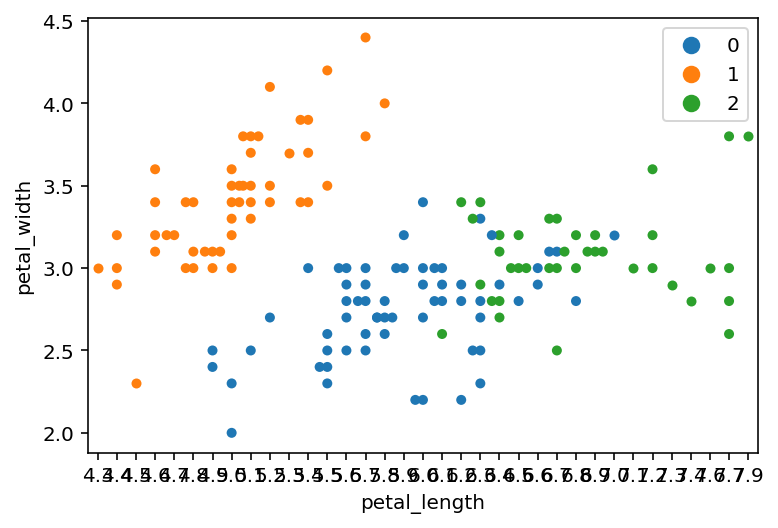

In [20]:
sn.swarmplot(x='petal_length',y='petal_width',
             hue=clusters,data=df)

**'sepal_length' Vs 'sepal_width'**

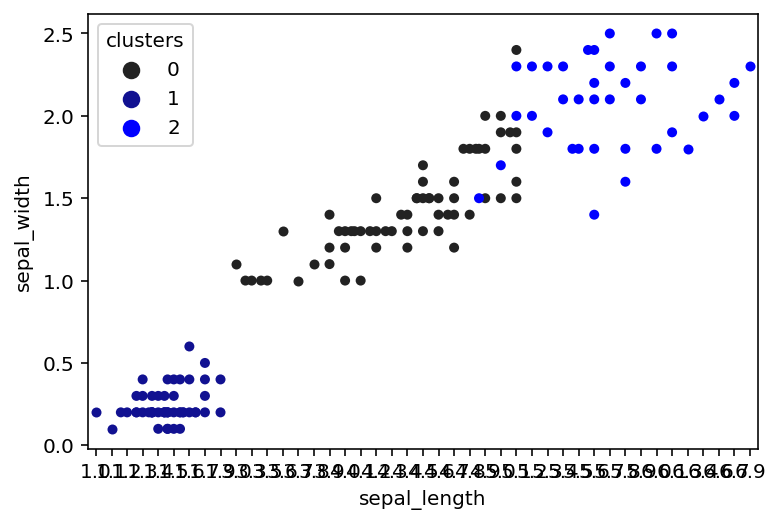

In [21]:
sn.swarmplot(x='sepal_length',y='sepal_width',
              color='blue',hue='clusters',data=df)

**'sepal_length' Vs 'petal_length'**

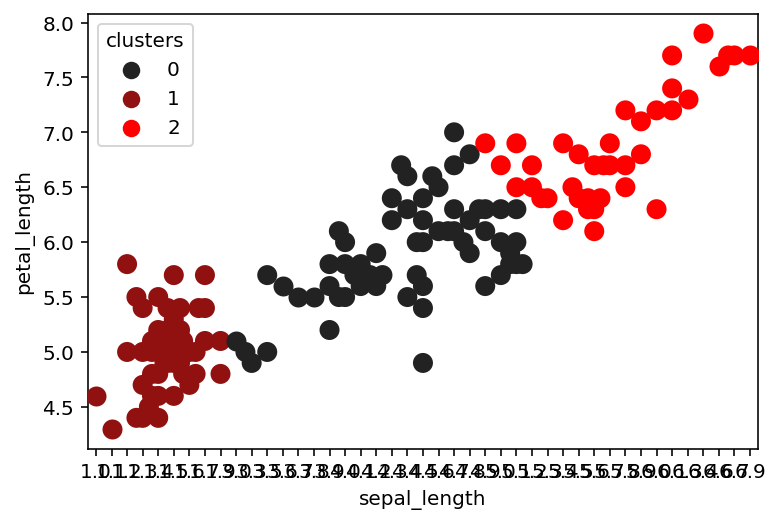

In [22]:
plt.subplots_adjust(right=0.9)
sn.swarmplot(x='sepal_length',y='petal_length',
             color='red',hue='clusters',size=10,data=df)

**'sepal_length' Vs 'petal_width'**

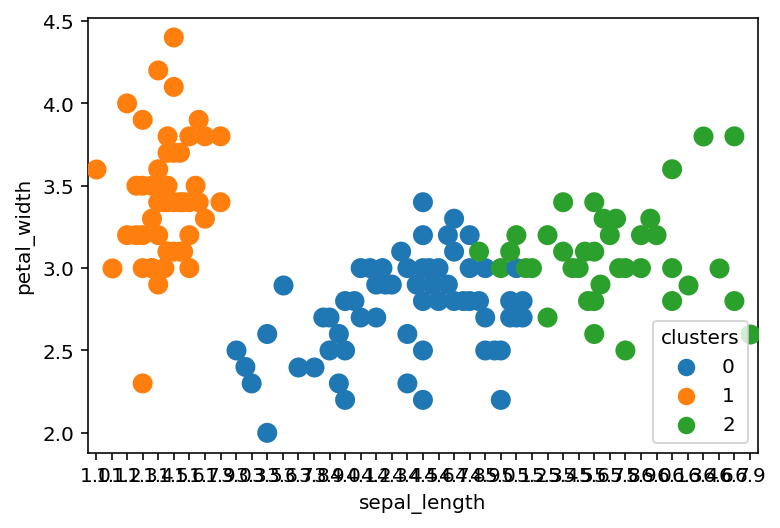

In [23]:
sn.swarmplot(x='sepal_length',y='petal_width',s=10,
              hue='clusters',data=df)

**As we can see from cluster visualisation,clustering using 'sepal_length' and 'petal_length' is good categorized**

# -------------------------------------------------------------------

## Clustering using Hirerachy Clustering Algorithm ##

In [24]:
import scipy.cluster.hierarchy as sch

In [28]:
iris=pd.read_csv("C:\\Users\\DHIRAJ PATIL\\Desktop\\Python\\Datasets\\iris.csv")
iris=iris.sample(frac=1,random_state=123)

In [30]:
iris.drop(['sepal_width','petal_width','type'],axis=1,inplace=True)

In [31]:
X=iris.values

**Plotting Dendrogram**

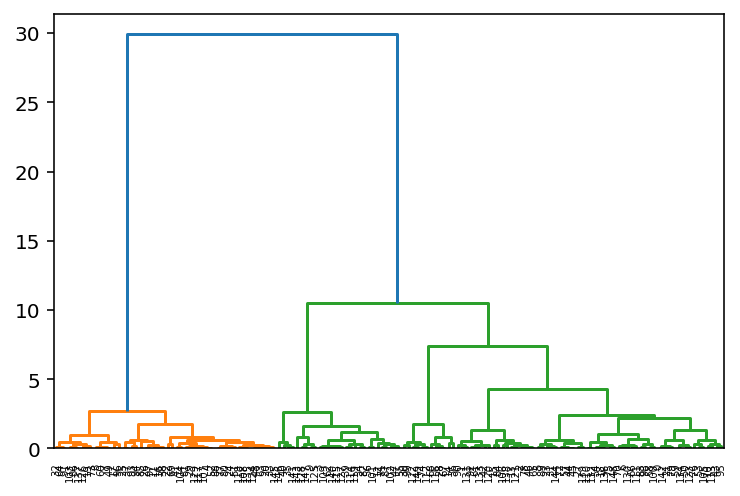

In [32]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))

In [31]:
# Based  on the dendrogram,the optiml clusters=2

In [33]:
from sklearn.cluster import AgglomerativeClustering as agc

In [35]:
hc=agc(n_clusters=2,affinity='euclidean',linkage='ward')
y=hc.fit_predict(X)

In [36]:
y

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

### Plotting Clusters

Text(0.5, 1.0, 'Clusters of Iris Using Hierarchy Clustering')

Text(0.5, 0, 'petal_length')

Text(0, 0.5, 'sepal_length')

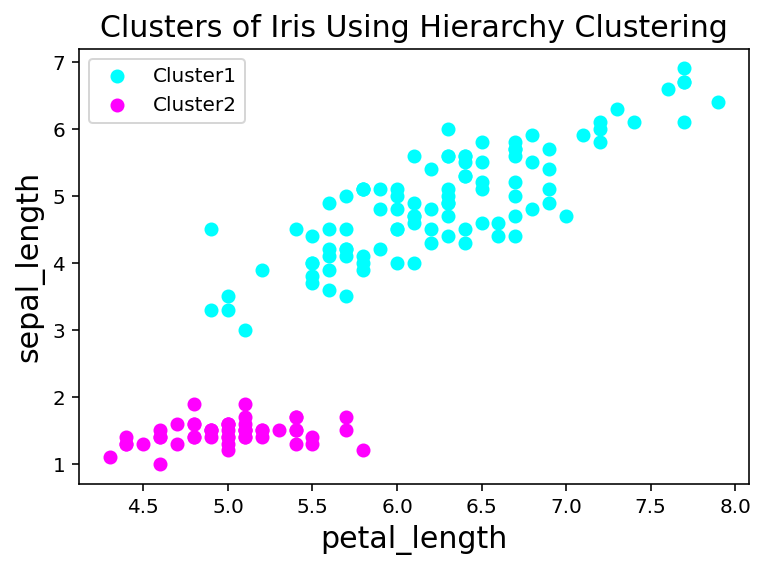

In [43]:
plt.scatter(x=X[y==0,0],y=X[y==0,1],color='cyan',label='Cluster1')
plt.scatter(x=X[y==1,0],y=X[y==1,1],color='magenta',label='Cluster2')
plt.title('Clusters of Iris Using Hierarchy Clustering',fontsize=15)
plt.xlabel('petal_length',fontsize=15)
plt.ylabel('sepal_length',fontsize=15)
plt.legend()
plt.show()

**From the above graph we can categorize whole dataset in two clusters**

**In cluster1:-  0<petal_length<6  and  0<sepal_length<2**

**In Cluster2:-  0<petal_length  and  2<sepal_length**